In [54]:
# Dependencies
import requests
import json
import random as r
import csv
import os
import pycountry
import citipy
from citipy import citipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# from config import api_key
api_key= " HERE"


In [23]:
# citypy module 
city = citipy.nearest_city(22.99, 120.21)
city
city.city_name
cc=city.country_code
cc

'tw'

In [34]:
# Generate random Cities

cities= []

lat_random = np.random.uniform(-90,90, 1500)
long_random=np.random.uniform(-180,180, 1500)


for lat_random, long_random in zip(lat_random,long_random):
#         print(f'latitud: {lat_random}')
#         print(f'longitude: {long_random}')
    city = citipy.nearest_city(lat_random,  long_random).city_name
    
    if city not in cities:
        cities.append(city)

# City count
len(cities)


604

In [26]:
# cities


In [47]:
# TEST WITH API
# API information from openweatherMap
# api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
# example http://api.openweathermap.org/data/2.5/weather?q=london&appid=7fb039cbbad3fa98c1aa56817a98ab43
# query_url = url + "appid=" + api_key + "&q=" + city + "&units=" + unit
# url="api.openweathermap.org/data/2.5/weather?"
# query_url = f"{url}appid={api_key}&q="

# a=requests.get(query_url+"london")
# a_j=a.json()

url = "http://api.openweathermap.org/data/2.5/weather?q="
citi = "london"

units = ["imperial"]
query_url = f"{url}{citi}&appid={api_key}&units=imperial"
query_url
response = requests.get(query_url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 51.51,
        "lon": -0.13
    },
    "dt": 1604093535,
    "id": 2643743,
    "main": {
        "feels_like": 56.77,
        "humidity": 87,
        "pressure": 1019,
        "temp": 58.59,
        "temp_max": 59,
        "temp_min": 57.99
    },
    "name": "London",
    "sys": {
        "country": "GB",
        "id": 1414,
        "sunrise": 1604040660,
        "sunset": 1604075829,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 220,
        "speed": 5.82
    }
}


In [35]:
# set up lists to hold reponse info

lat = [] #latitude
long=[]#longitude
t=[] # Temp in F
h =[] #humidity
c=[] # Cloudiness
w=[] #Wind Speed (mph)
city_name=[]
country=[]
weather_like=[]

# Loop through the list of cities and perform a request for data on each
cities

for city in cities:
    
            city_url = f"{url}{city}&appid={api_key}&units=imperial"
            response = requests.get(city_url).json()
#             print(json.dumps(response, indent=4, sort_keys=True))
#             city_name.append(response['city']['name'])
            
            try: 
                city_name.append(response['name'])
                c.append(response['clouds']['all'])
                country.append(response['sys']['country'])
                h.append(response['main']['humidity'])
                lat.append(response['coord']['lat'])
                long.append(response['coord']['lon'])
                t.append(response['main']['temp'])
                w.append(response['wind']['speed'])
#                 weather_like.append(response[list[0]]['weather'])

            except:                
                pass
            
len(t)

553

In [36]:
# Convert array of JSONs into Pandas DataFrame

city_data = {"City": city_name,"Country":country,"Latitude": lat, 
             "Longitude":long,"Temp":t,
             "Humidity":h,"Cloudiness":c,
             "Wind Speed":w}

city_df = pd.DataFrame(city_data)
city_df.head()


,City,Country,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed
0,Vyshneve,UA,50.39,30.37,47.64,93,90,8.95
1,Atuona,PF,-9.80,-139.03,77.77,72,98,11.54
2,Butaritari,KI,3.07,172.79,81.52,80,66,19.15
3,Albany,US,42.60,-73.97,35.06,85,74,4.27
4,Iqaluit,CA,63.75,-68.51,3.09,77,75,5.82


In [37]:
city_df.count()

City          553
Country       553
Latitude      553
Longitude     553
Temp          553
Humidity      553
Cloudiness    553
Wind Speed    553
dtype: int64

In [38]:
# export CVS
city_df.to_csv('city_info.csv',index= False)

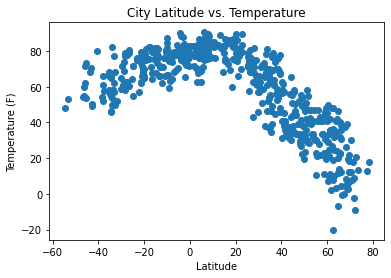

In [41]:
# PLOT DATA

# Scatter plot for latitude vs. temperature
latitude_plot = city_df["Latitude"]
temp_plot = city_df["Temp"]

plt.scatter(latitude_plot,temp_plot)
plt.title('City Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig('scatterplotlatitudetemp')
plt.show()


In [70]:
print ("Based on the colected information there is a clear correlation bewtween Tempeture and Latitude. The closer to 0 latitute the hotter is the City")

Based on the colected information there is a clear correlation bewtween Tempeture and Latitude. The closer to 0 latitute the hotter is the City


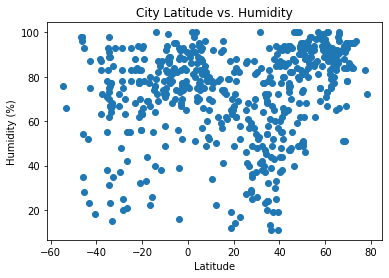

In [42]:
#Latitude vs. Humidity Plot
humidity_plot = city_df["Humidity"]

plt.scatter(latitude_plot,humidity_plot)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('scatterplotlatitudehumidity')
plt.show()

In [72]:
print ("Even though a correlationship between Humidity and Latitude might not be that strong, there is patter where for cities with latitute above 40, Humidity is high")

Even though a correlationship between Humidity and Latitude might not be that strong, there is patter where for cities with latitute above 40, Humidity is high


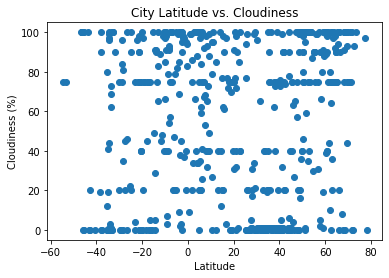

In [46]:
# Latitude vs. Cloudiness Plot
clouds_plot = city_df["Cloudiness"]

plt.scatter(latitude_plot,clouds_plot)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('scatterplotlatitudecloudiness')
plt.show()

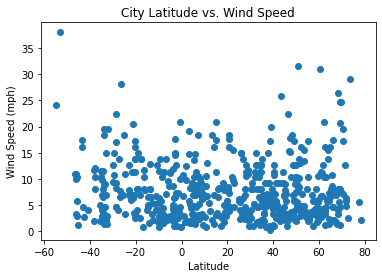

In [49]:
# Latitude vs. Wind Speed Plot
wind_plot = city_df["Wind Speed"]

plt.scatter(latitude_plot,wind_plot)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('scatterplotlatitudewindspeed')
plt.show()

In [73]:
print ("Based on the graph Latitude vs Wind Speed, evenly distributed across all latitudes we can conclude that latitude does not affect wind speed")

Based on the graph Latitude vs Wind Speed, evenly distributed across all latitudes we can conclude that latitude does not affect wind speed


In [ ]:
# LINEAR REGRESSION

In [50]:
# Function
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [52]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_df.loc[city_df["Latitude"] >= 0,:]
southern_df = city_df.loc[city_df["Latitude"] < 0,:]


The r-squared is: -0.8780619308117459


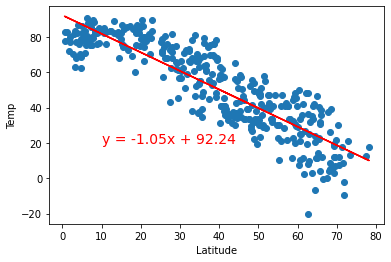

<Figure size 432x288 with 0 Axes>

In [75]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = northern_df["Latitude"]
y_values = northern_df["Temp"]
plot_linear_regression(x_values,y_values,'Temp',(10,20))
plt.savefig('northern-temp-latitude')


In [76]:
print ("With a r-square of -.87 and a graph that clearly shows it, there is a strong negative correlationship beteen Tempeture and Latitute. The higher the latitute the lower the tempeture will be.")

With a r-square of -.87 and a graph that clearly shows it, there is a strong negative correlationship beteen Tempeture and Latitute. The higher the latitute the lower the tempeture will be.


The r-squared is: 0.6782402705345579


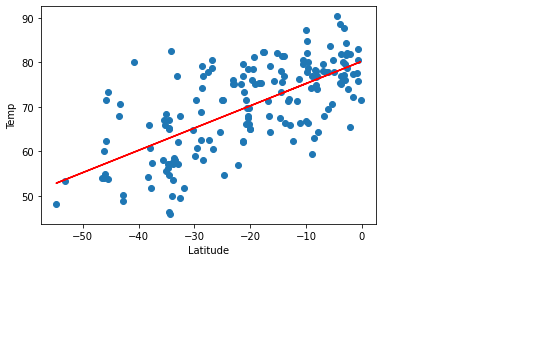

<Figure size 432x288 with 0 Axes>

In [59]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = southern_df["Latitude"]
y_values = southern_df["Temp"]
plot_linear_regression(x_values,y_values,'Temp',(10,20))

plt.savefig('southern-temp-latitue')


In [77]:
print ("In the Southern Hemisphere the correlation between Latitude and Temperature is less strong than in the Northern. With confidence of predicting the Temp in fucntion of Latitude of the City of 67%")

In the Southern Hemisphere the correlation between Latitude and Temperature is less strong than in the Northern. With confidence of predicting the Temp in fucntion of Latitude of the City of 67%


The r-squared is: 0.2501362999482717


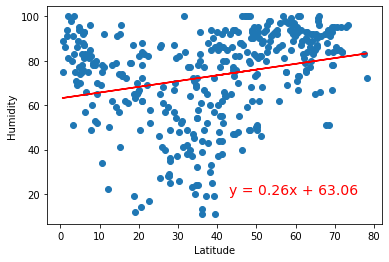

<Figure size 432x288 with 0 Axes>

In [83]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = northern_df["Latitude"]
y_values = northern_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(43,20))

plt.savefig('northern-humidity-latitude')

In [78]:
print ("In the Northern Hemisphere, there is not enough information to conclude any relationship between HUmidity and Latitude. However, above latitude 40 all the cities have a 40% or higher Humidity")

In the Northern Hemisphere, there is not enough information to conclude any relationship between HUmidity and Latitude. However, above latitude 40 all the cities have a 40% or higher Humidity


The r-squared is: 0.1763622599545127


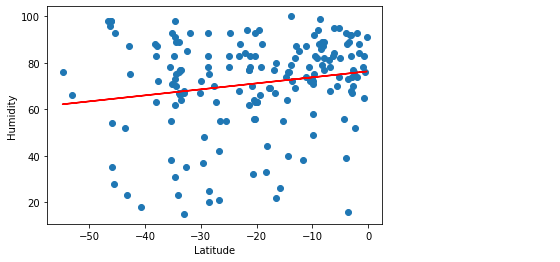

<Figure size 432x288 with 0 Axes>

In [61]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = southern_df["Latitude"]
y_values = southern_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(10,20))

plt.savefig('southern-humidity-latitude')


The r-squared is: 0.13587675078218373


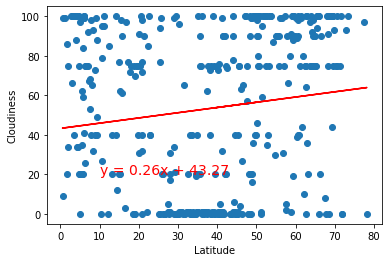

<Figure size 432x288 with 0 Axes>

In [62]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = northern_df["Latitude"]
y_values = northern_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(10,20))

plt.savefig('northern-clouds-latitude')

The r-squared is: 0.19769415077573727


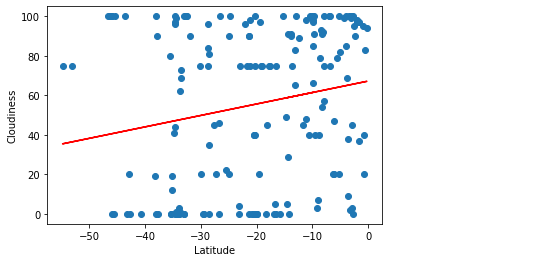

<Figure size 432x288 with 0 Axes>

In [63]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = southern_df["Latitude"]
y_values = southern_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(10,20))

plt.savefig('southern-clouds-latitude')



The r-squared is: 0.07068274846855004


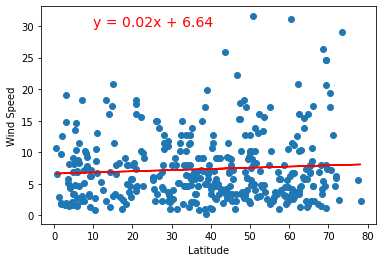

<Figure size 432x288 with 0 Axes>

In [65]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = northern_df["Latitude"]
y_values = northern_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(10,30))

plt.savefig('northern-wind-latitude')

In [86]:
print ("The graph above compares Wind speed versus latitude. With a very weak r square of .07, there seems to be no relationship between these two variables  in the Northern Hemisphere")

The graph above compares Wind speed versus latitude. With a very weak r square of .07, there seems to be no relationship between these two variables  in the Northern Hemisphere


The r-squared is: -0.24419282473631237


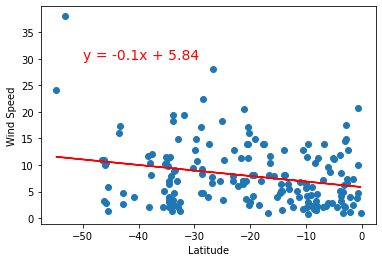

<Figure size 432x288 with 0 Axes>

In [68]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = southern_df["Latitude"]
y_values = southern_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(-50,30))

plt.savefig('southern-wind-latitude')


In [93]:
print ("The graph above compares Wind speed versus latitude in the Southern Hemisphere. Eventhough, the r square is stronger than in the Northern Hemisphere, still does not show a strong relationship between Latitute and Wind Speed")

The graph above compares Wind speed versus latitude in the Southern Hemisphere. Eventhough, the r square is stronger than in the Northern Hemisphere, still does not show a strong relationship between Latitute and Wind Speed


In [96]:
print ("In conclusion, the Wind Speed cannot be predicted based on Latitute of the city")
print ("There is a strong proven correlationship between Tempeture and Latitude. It is even stronger in the Nortther Hemisphere of the World, with a r-square of .87")
print ("Based on the information collected in this project, there is no evidence of relationship between Humidity and Latitude")

In conclusion, the Wind Speed cannot be predicted based on Latitute of the city
There is a strong proven correlationship between Tempeture and Latitude. It is even stronger in the Nortther Hemisphere of the World, with a r-square of .87
Based on the information collected in this project, there is no evidence of relationship between Humidity and Latitude
